In [2]:
pip install PyPDF2 pandas scikit-learn matplotlib

In [3]:
import PyPDF2
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt


In [24]:
# pdf_path = "C:/Users/aggar/oopsBookLafore.pdf"
# pdf_reader = PyPDF2.PdfReader(open(pdf_path, 'rb'))

# def extract_text(pdf_reader):
#     text = ""
#     for page in pdf_reader.pages:
#         # page = pdf_reader.getPage(page_num)
#         text += page.extract_text() or ""
#         text += "\n"
#     return text

# book_text = extract_text(pdf_reader)
# book_text

import PyPDF2

pdf_path = "C:/Users/aggar/oopsBookLafore.pdf"

with open(pdf_path, 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    
    def extract_text(pdf_reader):
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text() or ""
            text += "\n"
        return text

    book_text = extract_text(pdf_reader)

print(book_text)


Robert Lafore
800 East 96th St.,Indianapolis,Indiana 4624 0 USAObject-Oriented Programming in C++,
Fourth Edition00 3087 FM  11/29/01  2:15 PM  Page i
Copyright 2002 by Sams Publishing
All rights reserved. No part of this book shall be reproduced, stored in a
retrieval system, or transmitted by any means, electronic, mechanical, photo-copying, recording, or otherwise, without written permission from the pub-lisher. No patent liability is assumed with respect to the use of the informationcontained herein. Although every precaution has been taken in the preparationof this book, the publisher and author assume no responsibility for errors oromissions. Nor is any liability assumed for damages resulting from the use ofthe information contained herein.
International Standard Book Number: 0-672-32308-7Library of Congress Catalog Card Number: 2001094813Printed in the United States of AmericaFirst Printing: December 200104 03 02 01 4321
Trademarks
All terms mentioned in this book that are kno

In [30]:
# Patterns for splitting text by chapters and extracting exercises
chapter_pattern = r'(Chapter \d+)\s'
exercise_pattern = r'(Questions|Exercises)(.*?)(?=Chapter \d+|Appendix|$)'  # Capture "Questions" or "Exercises" sections
question_pattern = r'(\d+\.\s.*?)(?=\n\d+\.|\n\n|$)'  # Capture each numbered question

# Split text by chapters
chapters = re.split(chapter_pattern, book_text)
data = []

for i in range(1, len(chapters), 2):
    chapter_name = chapters[i].strip()
    chapter_text = chapters[i + 1]
    
    # Extract exercises within each chapter
    exercise_sections = re.findall(exercise_pattern, chapter_text, re.DOTALL)
    
    for _, content in exercise_sections:
        # Extract individual questions from each exercise section
        questions = re.findall(question_pattern, content, re.DOTALL)
        for question in questions:
            clean_question = re.sub(r'\s+', ' ', question).strip()  # Remove excessive whitespace
            data.append({"Chapter": chapter_name, "Question": clean_question})

# Convert to DataFrame
df = pd.DataFrame(data)
df.to_csv("extracted_questions.csv", index=False)
df

,Chapter,Question
0,Chapter 415605,16. The first three enumerators of an enum typ...
1,Chapter 415605,17. Write a statement that declares an enumera...
2,Chapter 415605,"18. State the reason that enum isWord{ NO, YES..."
3,Chapter 625607,6. 9. Member functions defined inside a class ...
4,Chapter 625607,10. Write a member function called getcrow() f...
...,...,...
166,Chapter 15,19. d20. c21. true22. iterators23. it’s a stri...
167,Chapter 15,1. // ex15_1.cpp // type float stored in array...
168,Chapter 15,4. // ex15_4.cpp// a multiset automatically so...
169,Chapter 16,1. false


In [36]:
df.to_csv(r'exerciseDataset.csv')

In [38]:
import pandas as pd

# Load the uploaded CSV file
file_path = (r"C:\Users\aggar\exerciseDataset.csv")
data = pd.read_csv(file_path)

# Display the first few rows and basic info to understand the dataset
data.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Chapter   171 non-null    object
 1   Question  171 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB


(   Unnamed: 0         Chapter  \
 0           0  Chapter 415605   
 1           1  Chapter 415605   
 2           2  Chapter 415605   
 3           3  Chapter 625607   
 4           4  Chapter 625607   
 
                                             Question  
 0  16. The first three enumerators of an enum typ...  
 1  17. Write a statement that declares an enumera...  
 2  18. State the reason that enum isWord{ NO, YES...  
 3  6. 9. Member functions defined inside a class ...  
 4  10. Write a member function called getcrow() f...  ,
 None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Chapter          167 non-null    object
 1   Question         167 non-null    object
 2   Question_Length  167 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.0+ KB


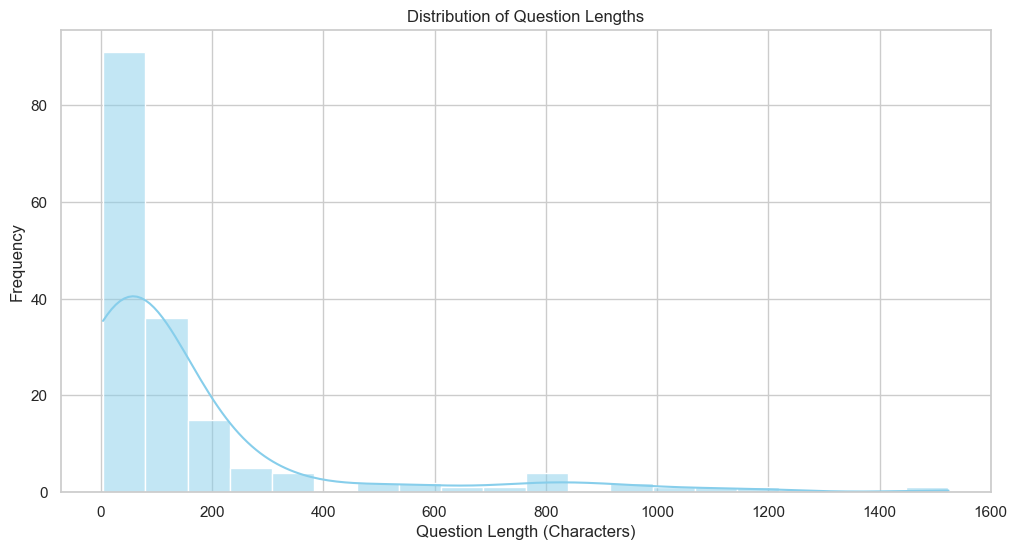

C:\Users\aggar\AppData\Local\Temp\ipykernel_1152\76432474.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x="Chapter", palette="viridis")


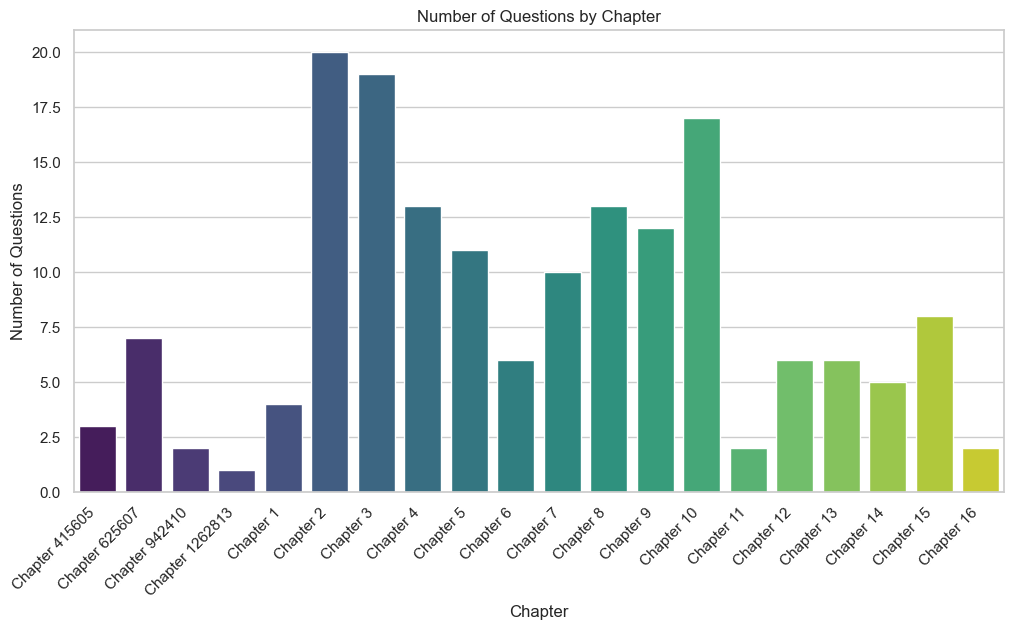

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop the unnamed index column
# df_cleaned = df.drop(columns=['Unnamed: 0'])

# Step 2: Standardize the "Chapter" column
# Removing any whitespace and ensuring all chapters follow the same "Chapter X" format
df_cleaned = df
df_cleaned['Chapter'] = df_cleaned['Chapter'].str.strip()

# Step 3: Check for duplicates in questions
df_cleaned = df_cleaned.drop_duplicates(subset='Question').reset_index(drop=True)

# Step 4: Add a column for question length to analyze text distribution
df_cleaned['Question_Length'] = df_cleaned['Question'].apply(len)

# Display cleaned dataset
df_cleaned.head(), df_cleaned.info()

# Set the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Visualization 1: Distribution of Question Lengths
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Question_Length'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Question Lengths")
plt.xlabel("Question Length (Characters)")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Count of Questions by Chapter
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x="Chapter", palette="viridis")
plt.title("Number of Questions by Chapter")
plt.xlabel("Chapter")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45, ha="right")
plt.show()


In [50]:
import PyPDF2

pdf_path = r"C:\Users\aggar\oopsqp.PDF"

with open(pdf_path, 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    
    def extract_text(pdf_reader):
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text() or ""
            text += "\n"
        return text

    qp_text = extract_text(pdf_reader)

print(qp_text)

RollNo: 
Thapar Institute of Engineering & Technology, Patiala 
Computer Science & Engineering Department 
Mid Semester Examination (MST) 
B. E. (First Year): Sem-II (2022-23) 	 Course Code: UTA018 (Object Oriented Programming) 
Date: 7-Mar 2023 	Time: 2 Hours 	M.Marks: 25 
Faculty: Raman Goyal, Jasvinder Pal Singh, Ravneet Kaur, Saif Nalband, Neenu Garg, 
Seemu Sharma, Deep Mann, Aditi Sharma, Amrita Dahiya, Naveen Kumar 
NOTE: Solve problems IN ORDER, otherwise they WILL NOT be checked. If you are not sure 
about the current question then leave appropriate pages and move on. New page for new 
problem. Do not use pencil for answering the questions, otherwise such answers will not be 
evaluated . 
Ql. "Friend functions can access private and protected members of a class but so do 
the member functions of a class". Then, what is the advantage of a friend function 
over a member function? (1 mark) 
Write a program in C++ to describe the advantage of friend function over 
member functions

In [54]:
import re
import pandas as pd

pdf_text = qp_text

# Step 1: Extract questions along with marks and other details
# Define patterns to capture question structure (e.g., Q1, Q2, or numbered points like (a), (b))
question_pattern = r"(Q\d+\. .*?)(?=Q\d+\.|$)"  # Matches each main question starting with "Q1.", "Q2.", etc.
subquestion_pattern = r"(\(.\))"  # Matches parts like (a), (b), etc.

# Extract all main questions
questions = re.findall(question_pattern, pdf_text, re.DOTALL)

data = []
for q in questions:
    # Clean up question text
    q_clean = re.sub(r'\s+', ' ', q).strip()
    
    # Attempt to separate sub-questions if they exist
    sub_questions = re.split(subquestion_pattern, q_clean)
    if len(sub_questions) > 1:
        # For each sub-question found, clean and add to the data
        for i in range(1, len(sub_questions), 2):
            question_text = f"{sub_questions[i]} {sub_questions[i + 1]}"
            data.append({"Question": question_text})
    else:
        # If no sub-questions, add the entire question text
        data.append({"Question": q_clean})

# Step 2: Convert to DataFrame
df_questions = pd.DataFrame(data)

# Display the cleaned questions
df_questions.head()

# Optional Step: Save to CSV for review
# df_questions.to_csv("cleaned_exam_questions.csv", index=False)
df_questions

,Question
0,(a) List different types of inheritance with ...
1,(b) Explain the working of copy constructor w...
2,(a) In the given code perform following tasks...
3,( ) 26. 27. 28. Test T1 (10) ; 29. T1 . show
4,( ) ; 30. Q3
5,(b) Write a program in C++ having the followi...
6,(a) A parameterized constructor should be def...
7,(b) A member function incrementCount(int n) t...
8,(c) A non-member function convertStep() shoul...
9,(d) A displayCount0 function should be provid...


Model Accuracy: 17.65%


C:\Users\aggar\AppData\Local\Temp\ipykernel_1152\2891963196.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exam_questions, x="Predicted_Chapter", palette="viridis")


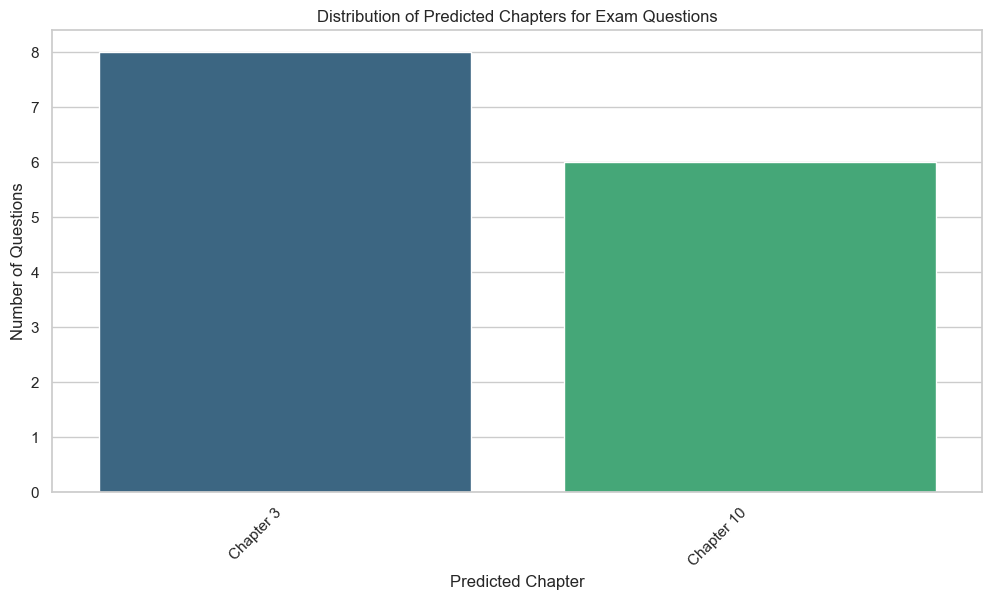

C:\Users\aggar\AppData\Local\Temp\ipykernel_1152\2891963196.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=exam_questions, x="Predicted_Chapter", y="Question_Length", palette="muted")


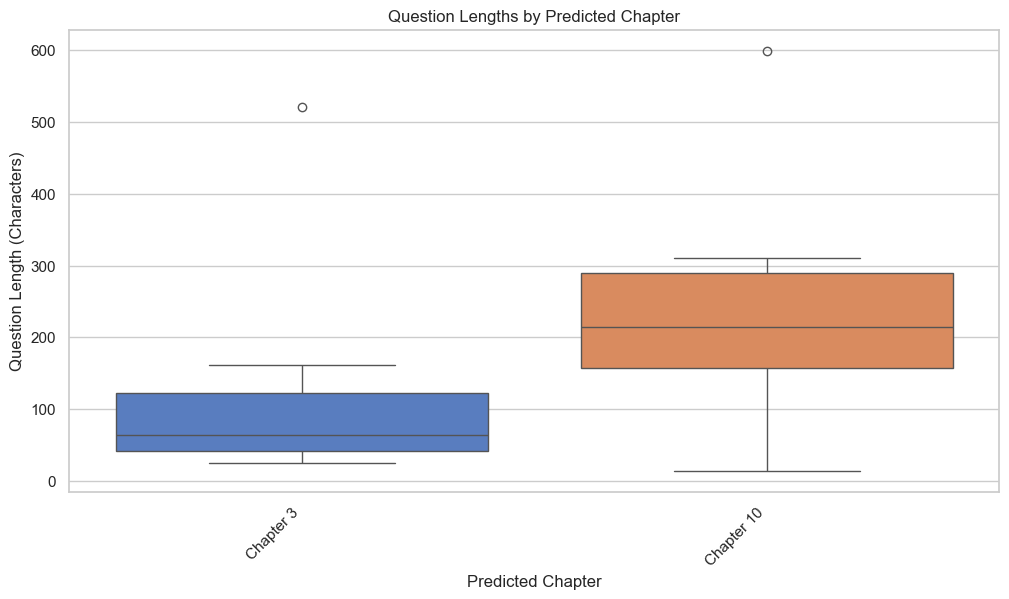

                                             Question Predicted_Chapter  \
0   (a)  List different types of inheritance with ...         Chapter 3   
1   (b)  Explain the working of copy constructor w...         Chapter 3   
2   (a)  In the given code perform following tasks...         Chapter 3   
3      ( )  26. 27. 28. Test T1 (10) ; 29. T1 . show          Chapter 3   
4                                      ( )  ; 30. Q3         Chapter 10   
5   (b)  Write a program in C++ having the followi...        Chapter 10   
6   (a)  A parameterized constructor should be def...        Chapter 10   
7   (b)  A member function incrementCount(int n) t...        Chapter 10   
8   (c)  A non-member function convertStep() shoul...        Chapter 10   
9   (d)  A displayCount0 function should be provid...         Chapter 3   
10  (e)  In addition, the class must use array of ...        Chapter 10   
11                          (a)  Namespace (2 marks)          Chapter 3   
12                       

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean back exercise data (df_cleaned)
# Assumes df_cleaned has 'Chapter' and 'Question' columns

# Step 1: Prepare training data
X = df_cleaned['Question']          # Text data (questions)
y = df_cleaned['Chapter']           # Labels (chapter)

# Split data into training and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for TF-IDF + Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Evaluate model accuracy on test data
predicted = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predicted)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 2: Load and classify exam questions
exam_questions = pd.read_csv(r"C:\Users\aggar\pyq_cleaned.csv")  # Replace with your exam data file
exam_questions['Predicted_Chapter'] = model.predict(exam_questions['Question'])

# Step 3: Visualize classified exam questions

# Visualization 1: Distribution of Predicted Chapters for Exam Questions
plt.figure(figsize=(12, 6))
sns.countplot(data=exam_questions, x="Predicted_Chapter", palette="viridis")
plt.title("Distribution of Predicted Chapters for Exam Questions")
plt.xlabel("Predicted Chapter")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45, ha="right")
plt.show()

# Optional Visualization 2: Compare Question Lengths in Exam Questions by Predicted Chapter
exam_questions['Question_Length'] = exam_questions['Question'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(data=exam_questions, x="Predicted_Chapter", y="Question_Length", palette="muted")
plt.title("Question Lengths by Predicted Chapter")
plt.xlabel("Predicted Chapter")
plt.ylabel("Question Length (Characters)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Optional: Save the classified exam questions to a CSV for further analysis
exam_questions.to_csv("classified_exam_questions.csv", index=False)
print(exam_questions)